In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_name = "test"
sub = pd.read_csv(f"../submissions/{file_name}.csv", dtype={'time': 'str'})
# test= pd.read_pickle('../features/test_v2.pkl')
df_test = pd.read_csv("../input/test_clean.csv")
df_test["open_channels"] = sub.open_channels

df_test["local_time"] = df_test.time % 50
df_test.loc[df_test.local_time == 0.0000, "local_time"] = 50

df_test["mini_local_time"] = df_test.time % 10
df_test.loc[df_test.local_time == 0.0000, "mini_local_time"] = 10

BATCH_SIZE = 500000

# test
for batch_i in range(4):
    df_test.loc[BATCH_SIZE * batch_i:BATCH_SIZE * batch_i + 500000, 'batch'] = batch_i + 1

    df_test.loc[BATCH_SIZE * batch_i:BATCH_SIZE * batch_i + 100000, 'mini_batch'] = 1
    df_test.loc[BATCH_SIZE * batch_i + 100000:BATCH_SIZE * batch_i + 200000, 'mini_batch'] = 2
    df_test.loc[BATCH_SIZE * batch_i + 200000:BATCH_SIZE * batch_i + 300000, 'mini_batch'] = 3
    df_test.loc[BATCH_SIZE * batch_i + 300000:BATCH_SIZE * batch_i + 400000, 'mini_batch'] = 4
    df_test.loc[BATCH_SIZE * batch_i + 400000:BATCH_SIZE * batch_i + 500000, 'mini_batch'] = 5

In [3]:
df_test.loc[(df_test.batch.isin([2])) & (df_test.mini_batch.isin([1, 3])),
            "signal"] += 2.73

In [4]:
color_list = [
    "b", "g", "r", "c", "m", "k", "y", '#0000FF', '#8A2BE2', '#A52A2A',
    '#DEB887', '#5F9EA0'
]

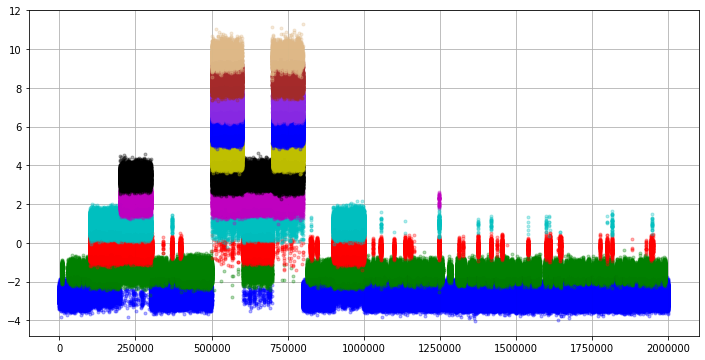

In [5]:
fig = plt.figure(figsize=(12, 6))
plt.grid()
for channel_i in range(11):
    plt.plot(df_test[df_test.open_channels == channel_i].signal,
             ".",
             color=color_list[channel_i],
             alpha=0.3)

In [6]:
# df_test.loc[(df_test.batch.isin([1])) & (df_test.mini_batch.isin([2])) &
#             (df_test.open_channels > 3), "open_channels"] = 3

# sub["open_channels"] = df_test["open_channels"]
# sub["open_channels"] = df_test.open_channels.astype("int64")
# sub.to_csv(f"../submissions/{file_name}.csv", index=None)
# sub.head()